# Установка нужных библиотек

In [1]:
import warnings
warnings.filterwarnings("ignore")

try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False
    
if IN_COLAB:
    !git clone -qq https://github.com/Intelligent-Systems-Phystech/ProjectTemplate.git /tmp/repo
    !python3 -m pip install -qq /tmp/repo/src/ && rm -rf /tmp/repo

  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.


# Импорт библиотек

In [2]:
import os

from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

from mylib.train import cv_parameters, Trainer, SyntheticBernuliDataset

# Настройка окружения

In [3]:
if IN_COLAB:
    figures = '.'
else:
    figures = '../figures'

# Работа с данными

## Генерация синтетической выборки

In [4]:
dataset = SyntheticBernuliDataset(n=10, m=100, seed=42)

# Эксперимент с логистической регрессией

## Обучение одной модели

In [5]:
trainer = Trainer(
    LogisticRegression(penalty='l1', solver='saga', C=1.0),
    dataset.X, dataset.y,
)

trainer.train()
print(trainer.eval())

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.93      1.00      0.97        14

    accuracy                           0.96        25
   macro avg       0.97      0.95      0.96        25
weighted avg       0.96      0.96      0.96        25



## Зависимость весов параметров от параметров регуляризации

In [6]:
Cs, accuracy, parameters = cv_parameters(dataset.X, dataset.y)

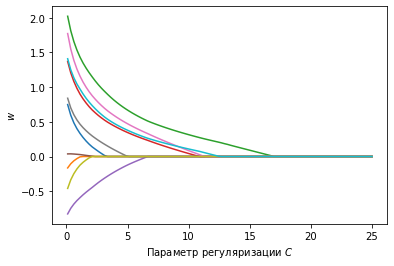

In [7]:
plt.plot(Cs, parameters)

plt.xlabel('Параметр регуляризации $C$')
plt.ylabel('$w$')

plt.savefig(
    os.path.join(figures, 'log_reg_cs_exp.eps'),
    bbox_inches='tight')

plt.show()